In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [267]:
train_df = pd.read_csv('/Users/jacobjones/github/datasci207_final_project/data/train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Data Cleaning

In [268]:
#replace nulls with -99
train_df = train_df.fillna(-99)
train_df["LogSalesPrice"] = np.log(train_df.SalePrice)

# Model Building (Model 1)

In [269]:
train = train_df.sample(frac=.7)
val = train_df.drop(train.index)

In [270]:
def show_history(history):
  plt.plot(history.history['loss'], color='black', label='train')
  plt.plot(history.history['val_loss'], color='red', label='val')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

In [271]:
def build_model1():
    #clear session
    tf.keras.backend.clear_session()

    #inputs
    OverallQual = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='OverallQual')
    OverallQual_binned = tf.keras.layers.Discretization(num_bins=10)(OverallQual)
    GrLivArea = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='GrLivArea')

   
    #outputs
    LogSalesPrice = tf.keras.layers.Dense(
      units=1, activation='relu', name='LogSalesPrice')(OverallQual)

    model = tf.keras.Model(inputs=[OverallQual,GrLivArea],
                         outputs=LogSalesPrice,
                         name='HomePriceEstimate')

    model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
      loss='MSE')
    

    return model


In [272]:
# model = build_model1()
# model.summary()

# history = model.fit(
#   x={
#       'OverallQual': train[['OverallQual']],
#       'GrLivArea': train[['GrLivArea']]},
#   y=train[['LogSalesPrice']],
#   epochs=15,
#   batch_size=64,
#   validation_data=(
#       {'OverallQual': train[['OverallQual']],
#       'GrLivArea': train[['GrLivArea']]},
#       val[['LogSalesPrice']]),
#   verbose=1)

# show_history(history)

# Model 2

In [273]:
non_numeric_cols = train_df.columns[train_df.dtypes != 'int64']
train_df.loc(axis=1)[non_numeric_cols]

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LogSalesPrice
0,RL,65.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.247694
1,RL,80.0,Pave,-99,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.109011
2,RL,68.0,Pave,-99,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.317167
3,RL,60.0,Pave,-99,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,-99,-99,-99,WD,Abnorml,11.849398
4,RL,84.0,Pave,-99,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.072541
1456,RL,85.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Unf,TA,TA,Y,-99,MnPrv,-99,WD,Normal,12.254863
1457,RL,66.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,RFn,TA,TA,Y,-99,GdPrv,Shed,WD,Normal,12.493130
1458,RL,68.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,TA,TA,Y,-99,-99,-99,WD,Normal,11.864462


In [274]:
numeric_cols_train = train_df.drop(axis=1,labels = non_numeric_cols)

In [275]:
numeric_cols_train.shape

(1460, 35)

In [276]:
def build_model2():
    tf.keras.backend.clear_session()
    
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(
        units=20,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dense(
        units=15,
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(
        units=10,
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(
        units=5,
        activation='relu'
    ))

    model.compile(loss='MSE', 
            optimizer='Adam', 
            metrics=['MAE',"MAPE"])
    return model

Epoch 1/1000
19/19 [==============================] - 0s 7ms/step - loss: 38442442752.0000 - MAE: 179638.1875 - MAPE: 99.4293 - val_loss: 39307776000.0000 - val_MAE: 180673.3281 - val_MAPE: 99.0579
Epoch 2/1000
19/19 [==============================] - 0s 2ms/step - loss: 37941317632.0000 - MAE: 178354.2969 - MAPE: 98.6610 - val_loss: 38609563648.0000 - val_MAE: 178851.8750 - val_MAPE: 97.9654
Epoch 3/1000
19/19 [==============================] - 0s 2ms/step - loss: 37007568896.0000 - MAE: 175905.9375 - MAPE: 97.1942 - val_loss: 37286354944.0000 - val_MAE: 175303.0781 - val_MAPE: 95.8225
Epoch 4/1000
19/19 [==============================] - 0s 2ms/step - loss: 35242868736.0000 - MAE: 171049.3281 - MAPE: 94.2380 - val_loss: 34727485440.0000 - val_MAE: 168119.6875 - val_MAPE: 91.4724
Epoch 5/1000
19/19 [==============================] - 0s 2ms/step - loss: 31998521344.0000 - MAE: 161702.2188 - MAPE: 88.5680 - val_loss: 30337228800.0000 - val_MAE: 154757.9375 - val_MAPE: 83.3720
Epoch 6/10

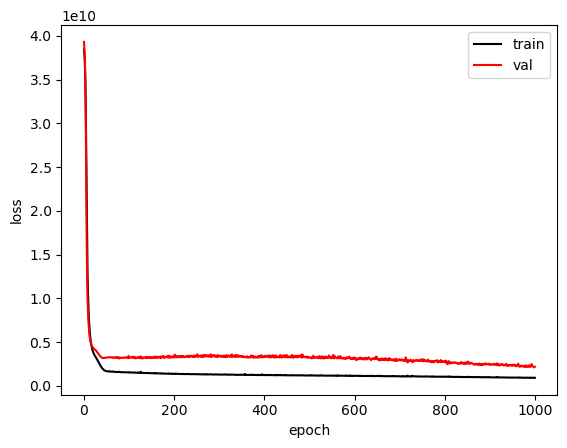

In [277]:
model2 = build_model2()
history = model2.fit(
    x=numeric_cols_train.drop(axis=1,labels="SalePrice"),
    y=numeric_cols_train.SalePrice,
    epochs=1000,
    batch_size=64,
    validation_split=.2,
    verbose=1)
show_history(history)

# Model 3

In [278]:
train_df[non_numeric_cols]

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LogSalesPrice
0,RL,65.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.247694
1,RL,80.0,Pave,-99,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.109011
2,RL,68.0,Pave,-99,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.317167
3,RL,60.0,Pave,-99,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,-99,-99,-99,WD,Abnorml,11.849398
4,RL,84.0,Pave,-99,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.072541
1456,RL,85.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Unf,TA,TA,Y,-99,MnPrv,-99,WD,Normal,12.254863
1457,RL,66.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,RFn,TA,TA,Y,-99,GdPrv,Shed,WD,Normal,12.493130
1458,RL,68.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,TA,TA,Y,-99,-99,-99,WD,Normal,11.864462


In [279]:
for col in non_numeric_cols:
    if train_df[col].dtype == 'object':  # Check if the column is of object type (non-numeric)
        if train_df[col].apply(lambda x: isinstance(x, (int, float))).any():  # Check if there are any numeric values
            train_df[col] = train_df[col].astype(str)  # Convert to string if there are numeric values
        label_encoder = LabelEncoder()
        train_df[col] = label_encoder.fit_transform(train_df[col])

In [280]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalesPrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,0,0,0,2,2008,8,4,208500,12.247694
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,0,0,0,5,2007,8,4,181500,12.109011
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,0,0,0,9,2008,8,4,223500,12.317167
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,0,0,0,2,2006,8,0,140000,11.849398
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,0,0,0,12,2008,8,4,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0,...,0,0,0,0,8,2007,8,4,175000,12.072541
1456,1457,20,3,85.0,13175,1,0,3,3,0,...,0,3,0,0,2,2010,8,4,210000,12.254863
1457,1458,70,3,66.0,9042,1,0,3,3,0,...,0,1,3,2500,5,2010,8,4,266500,12.493130
1458,1459,20,3,68.0,9717,1,0,3,3,0,...,0,0,0,0,4,2010,8,4,142125,11.864462


In [291]:
def train_model3():
    tf.keras.backend.clear_session()
    
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(
        units=20,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dense(
        units=15,
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(
        units=10,
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(
        units=5,
        activation='relu'
    ))

    model.compile(loss='MSE', 
            optimizer='Adam', 
            metrics=['MAE',"MAPE"])
    return model

Epoch 1/1000
19/19 [==============================] - 0s 6ms/step - loss: 38399152128.0000 - MAE: 179530.9531 - MAPE: 99.3660 - val_loss: 39268036608.0000 - val_MAE: 180568.4219 - val_MAPE: 98.9926
Epoch 2/1000
19/19 [==============================] - 0s 2ms/step - loss: 37871599616.0000 - MAE: 178157.4375 - MAPE: 98.5414 - val_loss: 38561890304.0000 - val_MAE: 178697.1562 - val_MAPE: 97.8618
Epoch 3/1000
19/19 [==============================] - 0s 2ms/step - loss: 36978929664.0000 - MAE: 175777.8281 - MAPE: 97.0967 - val_loss: 37359407104.0000 - val_MAE: 175432.5625 - val_MAPE: 95.8932
Epoch 4/1000
19/19 [==============================] - 0s 2ms/step - loss: 35480432640.0000 - MAE: 171622.6094 - MAPE: 94.5700 - val_loss: 35362729984.0000 - val_MAE: 169752.6250 - val_MAPE: 92.4612
Epoch 5/1000
19/19 [==============================] - 0s 2ms/step - loss: 33029771264.0000 - MAE: 164432.4375 - MAPE: 90.1983 - val_loss: 32144054272.0000 - val_MAE: 159968.0625 - val_MAPE: 86.5444
Epoch 6/10

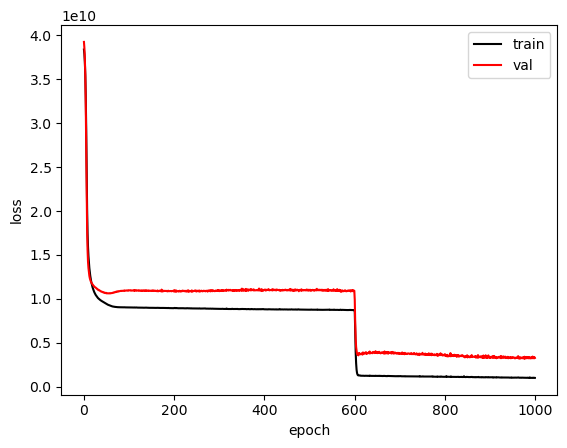

In [292]:
model3 = train_model3()
history = model3.fit(
    x=train_df.drop(axis=1,labels=["SalePrice","LogSalesPrice"]),
    y=train_df.SalePrice,
    epochs=1000,
    batch_size=64,
    validation_split=.2,
    verbose=1)
show_history(history)

# Model 4 Random Forest 

In [283]:
model4 = RandomForestRegressor()

In [284]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(axis=1,labels=["SalePrice","LogSalesPrice"]), train_df.SalePrice, test_size=0.2)

In [286]:
model4.fit(
    X=X_train,
    y=y_train)

RandomForestRegressor()

In [287]:
model4.score(X_test,y_test)

0.8824339188890611

In [294]:
predictions = model4.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 18580.568013698627
